# MINOR PROJECT

*THIS IS THE WORK DONE BY
 ON THE IDS INTRUSION

1. SIA DHAMA(230103009)
2. RIVEA BANSAL
3. NAMITA
4. ANIKET

DETECTION DATASET IN 2017 https://www.unb.ca/cic/datasets/ids-2017.html*

#importing libraries


In [1]:

import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_validate, cross_val_predict
from sklearn.metrics import f1_score, balanced_accuracy_score, matthews_corrcoef, confusion_matrix

In [2]:
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import os
import time
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
import scipy
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

In [3]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, KFold, cross_validate, cross_val_predict
from sklearn.metrics import f1_score, balanced_accuracy_score, roc_auc_score, matthews_corrcoef, confusion_matrix

# LOADING THE DATASET


In [4]:
# Use the wget command to download the ZIP file containing all CSVs
!wget http://cicresearch.ca/CICDataset/CIC-IDS-2017/Dataset/CIC-IDS-2017/CSVs/MachineLearningCSV.zip

# The file will be saved in your current working directory in the Colab instance, which is typically /content/

--2025-10-16 04:57:30--  http://cicresearch.ca/CICDataset/CIC-IDS-2017/Dataset/CIC-IDS-2017/CSVs/MachineLearningCSV.zip
Resolving cicresearch.ca (cicresearch.ca)... 205.174.165.80
Connecting to cicresearch.ca (cicresearch.ca)|205.174.165.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 235102953 (224M) [application/zip]
Saving to: ‘MachineLearningCSV.zip’

MachineLearningCSV. 100%[===================>] 224.21M  19.1MB/s    in 24s     

2025-10-16 04:57:54 (9.51 MB/s) - ‘MachineLearningCSV.zip’ saved [235102953/235102953]



In [5]:
 # Unzip the downloaded file
!unzip MachineLearningCSV.zip

Archive:  MachineLearningCSV.zip
   creating: MachineLearningCVE/
  inflating: MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv  
  inflating: MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv  
  inflating: MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv  
  inflating: MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv  
  inflating: MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv  
  inflating: MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv  
  inflating: MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv  
  inflating: MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv  


In [6]:
import pandas as pd
import os

# Define the base directory where the CSV files are located
data_dir = '/content/MachineLearningCVE/'

# Get a list of all CSV files in that directory
# We use endswith('.csv') to ensure we only target the data files.
all_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.csv')]

print(f"Found {len(all_files)} files to process.")
# print(all_files) # Uncomment this to see the list of file paths

Found 8 files to process.


In [7]:
import pandas as pd
import os
import numpy as np

# Define the base directory where the CSV files are located
data_dir = '/content/MachineLearningCVE/'

# Get a list of all CSV files in that directory
all_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.csv')]

print(f"Found {len(all_files)} files to process.\n")

# Initialize an empty list to hold the DataFrames
list_of_dfs = []

# --- 1. Read and Concatenate ---
for file_path in all_files:
    try:
        # Read the CSV file
        df_temp = pd.read_csv(file_path, low_memory=False)

        # Add the temporary DataFrame to our list
        list_of_dfs.append(df_temp)

        print(f"Loaded: {os.path.basename(file_path)} with shape {df_temp.shape}")

    except Exception as e:
        print(f"Error loading {os.path.basename(file_path)}: {e}")

# Concatenate all DataFrames in the list into one DataFrame
df = pd.concat(list_of_dfs, ignore_index=True)

print("\n--- Concatenation Complete ---")
print(f"Final shape of the raw master DataFrame: {df.shape}")
print("\nFirst 5 rows of the combined DataFrame:")
print(df.head())


Found 8 files to process.

Loaded: Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv with shape (288602, 79)
Loaded: Friday-WorkingHours-Morning.pcap_ISCX.csv with shape (191033, 79)
Loaded: Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv with shape (286467, 79)
Loaded: Wednesday-workingHours.pcap_ISCX.csv with shape (692703, 79)
Loaded: Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv with shape (225745, 79)
Loaded: Monday-WorkingHours.pcap_ISCX.csv with shape (529918, 79)
Loaded: Tuesday-WorkingHours.pcap_ISCX.csv with shape (445909, 79)
Loaded: Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv with shape (170366, 79)

--- Concatenation Complete ---
Final shape of the raw master DataFrame: (2830743, 79)

First 5 rows of the combined DataFrame:
    Destination Port   Flow Duration   Total Fwd Packets  \
0                 22             166                   1   
1              60148              83                   1   
2                123           99947        

# PREPROCESSING DATA

In [10]:
print(df.head())

    Flow Duration   Total Fwd Packets   Total Backward Packets  \
0             166                   1                        1   
1              83                   1                        2   
2           99947                   1                        1   
3           37017                   1                        1   
4       111161336                 147                        0   

   Total Length of Fwd Packets   Total Length of Bwd Packets  \
0                            0                             0   
1                            0                             0   
2                           48                            48   
3                           48                            48   
4                            0                             0   

    Fwd Packet Length Max   Fwd Packet Length Min   Fwd Packet Length Mean  \
0                       0                       0                      0.0   
1                       0                       0             

In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830743 entries, 0 to 2830742
Data columns (total 78 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Flow Duration                int64  
 1    Total Fwd Packets            int64  
 2    Total Backward Packets       int64  
 3   Total Length of Fwd Packets   int64  
 4    Total Length of Bwd Packets  int64  
 5    Fwd Packet Length Max        int64  
 6    Fwd Packet Length Min        int64  
 7    Fwd Packet Length Mean       float64
 8    Fwd Packet Length Std        float64
 9   Bwd Packet Length Max         int64  
 10   Bwd Packet Length Min        int64  
 11   Bwd Packet Length Mean       float64
 12   Bwd Packet Length Std        float64
 13  Flow Bytes/s                  float64
 14   Flow Packets/s               float64
 15   Flow IAT Mean                float64
 16   Flow IAT Std                 float64
 17   Flow IAT Max                 int64  
 18   Flow IAT Min         

In [12]:
print(df.describe())

        Flow Duration   Total Fwd Packets   Total Backward Packets  \
count    2.830743e+06        2.830743e+06             2.830743e+06   
mean     1.478566e+07        9.361160e+00             1.039377e+01   
std      3.365374e+07        7.496728e+02             9.973883e+02   
min     -1.300000e+01        1.000000e+00             0.000000e+00   
25%      1.550000e+02        2.000000e+00             1.000000e+00   
50%      3.131600e+04        2.000000e+00             2.000000e+00   
75%      3.204828e+06        5.000000e+00             4.000000e+00   
max      1.200000e+08        2.197590e+05             2.919220e+05   

       Total Length of Fwd Packets   Total Length of Bwd Packets  \
count                 2.830743e+06                  2.830743e+06   
mean                  5.493024e+02                  1.616264e+04   
std                   9.993589e+03                  2.263088e+06   
min                   0.000000e+00                  0.000000e+00   
25%                   1.20000

In [13]:
print(df.columns)

Index([' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length',
       ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance',
       'FIN Flag Count', ' SY

In [14]:
#dropping all port and ip address that exist as they are not relevant to our actual data predictions
df.drop(' Destination Port',axis=1, inplace=True)

KeyError: "[' Destination Port'] not found in axis"

In [15]:
print(df.value_counts())

 Flow Duration   Total Fwd Packets   Total Backward Packets  Total Length of Fwd Packets   Total Length of Bwd Packets   Fwd Packet Length Max   Fwd Packet Length Min   Fwd Packet Length Mean   Fwd Packet Length Std  Bwd Packet Length Max   Bwd Packet Length Min   Bwd Packet Length Mean   Bwd Packet Length Std  Flow Bytes/s   Flow Packets/s   Flow IAT Mean   Flow IAT Std   Flow IAT Max   Flow IAT Min  Fwd IAT Total   Fwd IAT Mean   Fwd IAT Std   Fwd IAT Max   Fwd IAT Min  Bwd IAT Total   Bwd IAT Mean   Bwd IAT Std   Bwd IAT Max   Bwd IAT Min  Fwd PSH Flags   Bwd PSH Flags   Fwd URG Flags   Bwd URG Flags   Fwd Header Length   Bwd Header Length  Fwd Packets/s   Bwd Packets/s   Min Packet Length   Max Packet Length   Packet Length Mean   Packet Length Std   Packet Length Variance  FIN Flag Count   SYN Flag Count   RST Flag Count   PSH Flag Count   ACK Flag Count   URG Flag Count   CWE Flag Count   ECE Flag Count   Down/Up Ratio   Average Packet Size   Avg Fwd Segment Size   Avg Bwd Segmen

In [16]:
print(df.isnull().sum().sum())

1358


In [17]:
print(df.columns.tolist())


[' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count', ' SYN Flag Count', ' RST Flag Count', ' PSH Flag Count', ' ACK Flag Count', ' URG Flag Count', ' CWE Flag Co

In [18]:
df.columns = df.columns.str.strip()

In [19]:
#since the total sum of null values are so little so we will remove the these rows completely
print(df['Label'].unique())
df['Label'].value_counts()
# duplicates,missing and infinity values
df.replace('Infinity', -1, inplace=True)
df[["Flow Bytes/s", "Flow Packets/s"]] = df[["Flow Bytes/s", "Flow Packets/s"]].apply(pd.to_numeric)
df.replace([np.inf, -np.inf, np.nan], -1, inplace=True)
print(df.shape)

['BENIGN' 'Infiltration' 'Bot' 'PortScan' 'DoS slowloris'
 'DoS Slowhttptest' 'DoS Hulk' 'DoS GoldenEye' 'Heartbleed' 'DDoS'
 'FTP-Patator' 'SSH-Patator' 'Web Attack � Brute Force' 'Web Attack � XSS'
 'Web Attack � Sql Injection']
(2830743, 78)


In [20]:
#  Remove duplicate rows ---
df = df.drop_duplicates()
print(f" Duplicates removed. New shape: {df.shape}")

# Replace infinity values (∞, -∞) with NaN ---
df.replace([np.inf, -np.inf], np.nan, inplace=True)
print(" Replaced infinity values with NaN.")

#  Drop rows with any remaining NaN values ---
df.dropna(inplace=True)
print(f" Dropped rows with null values. Final shape: {df.shape}")


 Duplicates removed. New shape: (2233963, 78)
 Replaced infinity values with NaN.
 Dropped rows with null values. Final shape: (2233963, 78)


In [21]:
#label encoding
from collections import Counter
# original labels
y = df['Label']
# set threshold for "rare" classes
threshold = 100   # you can tune this (<= 100 samples → merge)
counts = Counter(y)
# group rare classes into "OtherAttack"
y_grouped = y.apply(lambda x: x if counts[x] >= threshold else "OtherAttack")
print("Original counts:\n", pd.Series(y).value_counts())
print("\nAfter grouping:\n", pd.Series(y_grouped).value_counts())

Original counts:
 Label
BENIGN                        1897458
DoS Hulk                       172849
DDoS                           128016
DoS GoldenEye                   10286
FTP-Patator                      5933
DoS slowloris                    5385
DoS Slowhttptest                 5228
SSH-Patator                      3219
PortScan                         1958
Web Attack � Brute Force         1470
Bot                              1441
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

After grouping:
 Label
BENIGN                      1897458
DoS Hulk                     172849
DDoS                         128016
DoS GoldenEye                 10286
FTP-Patator                    5933
DoS slowloris                  5385
DoS Slowhttptest               5228
SSH-Patator                    3219
PortScan                       1958
Web Attack � Brute Force       1

In [22]:
#creating the input and output features
X = df.drop(columns=['Label'])
y = y_grouped
# drop non numeric data types with labels
drop_cols = [c for c in ['Flow ID', 'Source IP', 'Destination IP', 'Timestamp'] if c in X.columns]
X = X.drop(columns=drop_cols, errors='ignore')

In [23]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("After cleaning & scaling:", X_scaled.shape, y_encoded.shape)
X_train, X_test, y_train, y_test = train_test_split( X_scaled, y_encoded, test_size=0.3, random_state=42 )

After cleaning & scaling: (2233963, 77) (2233963,)


In [24]:
#  Remove duplicate rows ---
df = df.drop_duplicates()
print(f" Duplicates removed. New shape: {df.shape}")

# Replace infinity values (∞, -∞) with NaN ---
df.replace([np.inf, -np.inf], np.nan, inplace=True)
print(" Replaced infinity values with NaN.")

#  Drop rows with any remaining NaN values ---
df.dropna(inplace=True)
print(f" Dropped rows with null values. Final shape: {df.shape}")

 Duplicates removed. New shape: (2233963, 78)
 Replaced infinity values with NaN.
 Dropped rows with null values. Final shape: (2233963, 78)


# Feature selection

Here we will try and reduce the feature using a combination of multiple methods and then finding the common elements from them

In [ ]:
### WHALE OPTIMISATION METHODS

In [ ]:
def fitness_function(mask, X, y):
    """
    Fitness function using Logistic Regression (Accuracy or F1).
    Returns mean cross-validation score for selected features.
    """
    if mask.sum() == 0:  # avoid empty feature subset
        return -np.inf

    X_sel = X[:, mask == 1]  # select features where mask=1
    clf = Pipeline([
        ('scaler', StandardScaler()),
        ('lr', LogisticRegression(max_iter=500, solver='liblinear', class_weight='balanced'))
    ])

    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    score = cross_val_score(clf, X_sel, y, cv=cv, scoring='f1_macro').mean()
    return score


In [ ]:
def binary_woa_probabilistic(X_train, y_train,
                             n_whales=10,
                             n_iter=20,
                             copy_prob=0.6,
                             mutation_prob=0.5,
                             global_influence=0.5,
                             selection_pressure=3.0,
                             random_state=None):
    """
    Adaptive probabilistic Binary Whale Optimization Algorithm for feature selection.
    """
    if isinstance(random_state, int) or random_state is None:
        rs = np.random.RandomState(random_state)
    else:
        rs = random_state

    n_features = X_train.shape[1]
    whales = rs.randint(0, 2, size=(n_whales, n_features)).astype(int)
    fitnesses = np.array([fitness_function(whales[i], X_train, y_train) for i in range(n_whales)], dtype=float)

    # Replace -inf with small number
    finite_mask = np.isfinite(fitnesses)
    if not finite_mask.all():
        min_finite = np.min(fitnesses[finite_mask]) if finite_mask.any() else 0.0
        fitnesses[~finite_mask] = min_finite - 1.0

    best_idx = int(np.nanargmax(fitnesses))
    best_whale = whales[best_idx].copy()
    best_fitness = float(fitnesses[best_idx])

    # Main optimization loop
    for it in range(n_iter):
        # Probabilities from fitness
        f = fitnesses.copy()
        f_shift = f - np.min(f)
        scaled = np.exp(selection_pressure * (f_shift - f_shift.max()))
        scaled[~np.isfinite(scaled)] = 0
        probs = scaled / np.sum(scaled) if np.sum(scaled) > 0 else np.ones(n_whales) / n_whales

        new_whales = whales.copy()

        for i in range(n_whales):
            leader_idx = rs.choice(n_whales, p=probs)
            leader = whales[leader_idx]
            guide = best_whale if rs.rand() < global_influence else leader

            mask_copy = rs.rand(n_features) < copy_prob
            new_bits = np.where(mask_copy, guide, whales[i])

            # small random mutation
            mutation_mask = rs.rand(n_features) < mutation_prob
            new_bits[mutation_mask] = 1 - new_bits[mutation_mask]

            new_whales[i] = new_bits.astype(int)

        whales = new_whales
        fitnesses = np.array([fitness_function(whales[i], X_train, y_train) for i in range(n_whales)], dtype=float)

        iter_best_idx = int(np.nanargmax(fitnesses))
        iter_best_fitness = float(fitnesses[iter_best_idx])

        if iter_best_fitness > best_fitness:
            best_fitness = iter_best_fitness
            best_whale = whales[iter_best_idx].copy()


        worst_idx = int(np.nanargmin(fitnesses))
        whales[worst_idx] = best_whale.copy()
        fitnesses[worst_idx] = best_fitness

        print(f"Iteration {it+1}/{n_iter} -> Best Fitness: {best_fitness:.4f}, Selected Features: {best_whale.sum()}")

    return best_whale, best_fitness

In [ ]:
from sklearn.model_selection import cross_val_score


In [ ]:
best_mask, best_score = binary_woa_probabilistic( X_train,y_train, n_whales=20, n_iter=30, copy_prob=0.6, mutation_prob=0.02, global_influence=0.7, selection_pressure=6.0, random_state=42 )

In [ ]:
selected_features = np.where(best_mask == 1)[0]
print("\n================ IDS FEATURE SELECTION RESULTS ================")
print(f" Best Fitness Score (F1/Accuracy): {best_score:.4f}")
print(f" Total Selected Features: {len(selected_features)} / {X_train.shape[1]}")
print(f" Selected Feature Indices: {selected_features.tolist()}")

try:
    # If X_train is a DataFrame, show feature names
    feature_names = list(X_train.columns)
    selected_names = [feature_names[i] for i in selected_features]
    print("\n Selected Feature Names (Top 10):", selected_names[:10])
except Exception:
    pass

print("===============================================================\n")

In [ ]:
selected_indices=[6, 7, 8, 9, 10, 11, 13, 15, 16, 17, 18, 19, 21, 23, 26, 29]
selected_feature_names =df.columns[selected_indices].tolist()
print("Selected feature names:", selected_feature_names)

In [ ]:
print("WOA selected features:", best_mask.sum())
print("WOA selected features:", best_mask)
print("Best fitness:", best_score)

gained after woa

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Scale features to [0, 1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)   # or your IDS feature matrix

# Select top 20 features
selector = SelectKBest(score_func=chi2, k=20)
X_new = selector.fit_transform(X_scaled, y)

selected_indices = selector.get_support(indices=True)
print("Top feature indices:", selected_indices)


In [ ]:
selected_features = X.columns[selector.get_support()]

print("Selected Features by Chi-Square Test:")
for feature in selected_features:
    print("-", feature)

# Optional: show all scores for comparison
chi_scores = pd.DataFrame({
    'Feature': X.columns,
    'Chi2 Score': selector.scores_
}).sort_values(by='Chi2 Score', ascending=False)

print("\n Feature Scores:")
print(chi_scores)

gained after chi square test


infinte feature selection

now we shall find the correlations between these and combine the results

In [ ]:
#woa results
woa_indices=[6, 7, 8, 9, 10, 11, 13, 15, 16, 17, 18, 19, 21, 23, 26, 29]
#chi square results
chi_indices=[ 0,9,11,12,16,17,19,21,22,27,38,39,40,41,42 ,51, 53, 73, 75, 76]

# Namita ' section : random forest model training

In [25]:
woa_indices = [6, 7, 8, 9, 10, 11, 13, 15, 16, 17, 18, 19, 21, 23, 26, 29]
chi_indices = [0, 9, 11, 12, 16, 17, 19, 21, 22, 27, 38, 39, 40, 41, 42, 51, 53, 73, 75, 76]

union_indices = sorted(set(woa_indices) | set(chi_indices))
print(union_indices)

[0, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 21, 22, 23, 26, 27, 29, 38, 39, 40, 41, 42, 51, 53, 73, 75, 76]


In [26]:
new_df = df.iloc[:, union_indices]
print("New shape:", new_df.shape)
print("Selected columns:", new_df.columns.tolist())

New shape: (2233963, 30)
Selected columns: ['Flow Duration', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Std', 'Bwd IAT Max', 'Fwd PSH Flags', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'Average Packet Size', 'Avg Bwd Segment Size', 'Idle Mean', 'Idle Max', 'Idle Min']


In [27]:
print(df.columns.tolist())

['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count', 'Down/Up Ratio', 

In [28]:
new_df['Label'] = df['Label']

XGBoost Model Training

In [29]:
!pip install xgboost joblib --quiet

In [30]:
import os
import joblib
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from google.colab import drive
import pandas as pd

In [ ]:
# # ========================================
# # 1. Use your processed dataframe (already in memory)
# # ========================================
# print(" Using existing dataframe:")
# print("Shape:", new_df.shape)

# # Replace 'Label' with your actual target column name if different
# label_col = 'Label'

# X = new_df.drop(label_col, axis=1)
# y = new_df[label_col]

# # Encode labels (XGBoost needs numeric)
# le = LabelEncoder()
# y = le.fit_transform(y)

# # ========================================
# # 2. Split into train/test
# # ========================================
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42, stratify=y
# )

# # Convert to DMatrix (more efficient for large data)
# dtrain = xgb.DMatrix(X_train, label=y_train)
# dtest = xgb.DMatrix(X_test, label=y_test)

# # ========================================
# # 3. Define model parameters
# # ========================================
# params = {
#     'objective': 'multi:softmax',  # or 'multi:softprob' for probabilities
#     'num_class': len(set(y)),
#     'learning_rate': 0.1,
#     'max_depth': 8,
#     'subsample': 0.8,
#     'colsample_bytree': 0.8,
#     'eval_metric': 'mlogloss',
#     'tree_method': 'hist',   # Very memory-efficient (use 'gpu_hist' if GPU available)
#     'nthread': -1
# }

# # ========================================
# # 4. Train the model
# # ========================================
# num_rounds = 200  # You can reduce this to 50–100 for faster testing

# print(" Training XGBoost model...")
# booster = xgb.train(
#     params=params,
#     dtrain=dtrain,
#     num_boost_round=num_rounds,
#     evals=[(dtrain, 'train'), (dtest, 'test')],
#     verbose_eval=25  # Show progress every 25 rounds
# )
# print(" Training complete!")

# # ========================================
# # 5. Evaluate
# # ========================================
# y_pred = booster.predict(dtest)
# acc = accuracy_score(y_test, y_pred)

# print(f"\n Accuracy: {acc:.4f}")
# print("\n Classification Report:\n", classification_report(y_test, y_pred))


 Using existing dataframe:
Shape: (2233963, 31)
 Training XGBoost model...
[0]	train-mlogloss:1.99226	test-mlogloss:1.99239
[25]	train-mlogloss:0.12659	test-mlogloss:0.12698
[50]	train-mlogloss:0.01943	test-mlogloss:0.02003
[75]	train-mlogloss:0.00941	test-mlogloss:0.01026
[100]	train-mlogloss:0.00787	test-mlogloss:0.00892
[125]	train-mlogloss:0.00728	test-mlogloss:0.00852
[150]	train-mlogloss:0.00691	test-mlogloss:0.00836
[175]	train-mlogloss:0.00666	test-mlogloss:0.00833
[199]	train-mlogloss:0.00650	test-mlogloss:0.00833
 Training complete!

 Accuracy: 0.9977

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    379492
           1       0.90      0.62      0.73       288
           2       1.00      1.00      1.00     25603
           3       0.99      0.99      0.99      2057
           4       1.00      0.99      0.99     34570
           5       0.94      0.99      0.96      1046
           6       1.00    

In [31]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

# Assuming new_df has both features and label
label_col = 'Label'
X = new_df.drop(label_col, axis=1)
y = new_df[label_col]

# Encode string labels to numeric
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Ensure all features are numeric
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = pd.factorize(X[col])[0]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# XGBoost params
params = {
    'objective': 'multi:softprob',
    'num_class': len(le.classes_),
    'eval_metric': 'mlogloss',
    'tree_method': 'hist',  # efficient for large data
}

# Chunked training
chunk_size = 200_000
model = None

for start in range(0, len(X_train), chunk_size):
    end = min(start + chunk_size, len(X_train))
    X_chunk = X_train.iloc[start:end]
    y_chunk = y_train[start:end]

    dtrain = xgb.DMatrix(X_chunk, label=y_chunk)
    model = xgb.train(
        params,
        dtrain,
        num_boost_round=50,
        xgb_model=model  # continue training from previous chunk
    )
    print(f"Trained up to rows: {end}")

# Save model
model.save_model("xgboost_cicids2017_full.model")
print("Model saved.")

# Evaluate on test set
dtest = xgb.DMatrix(X_test)
y_pred_proba = model.predict(dtest)
y_pred = np.argmax(y_pred_proba, axis=1)  # get class with highest probability

# Metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Optional: detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Save label encoder for decoding predictions later
import pickle
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)


Trained up to rows: 200000
Trained up to rows: 400000
Trained up to rows: 600000
Trained up to rows: 800000
Trained up to rows: 1000000
Trained up to rows: 1200000
Trained up to rows: 1400000
Trained up to rows: 1600000
Trained up to rows: 1787170
Model saved.
Accuracy: 0.9973
F1 Score: 0.9973
Precision: 0.9973
Recall: 0.9973

Classification Report:
                            precision    recall  f1-score   support

                    BENIGN       1.00      1.00      1.00    379492
                       Bot       0.78      0.66      0.71       288
                      DDoS       1.00      1.00      1.00     25603
             DoS GoldenEye       0.99      0.98      0.99      2057
                  DoS Hulk       1.00      0.99      0.99     34570
          DoS Slowhttptest       0.94      0.98      0.96      1046
             DoS slowloris       1.00      1.00      1.00      1077
               FTP-Patator       0.99      1.00      0.99      1187
                Heartbleed       1.

NameError: name 'ConfusionMatrixDisplay' is not defined

<Figure size 1000x800 with 0 Axes>

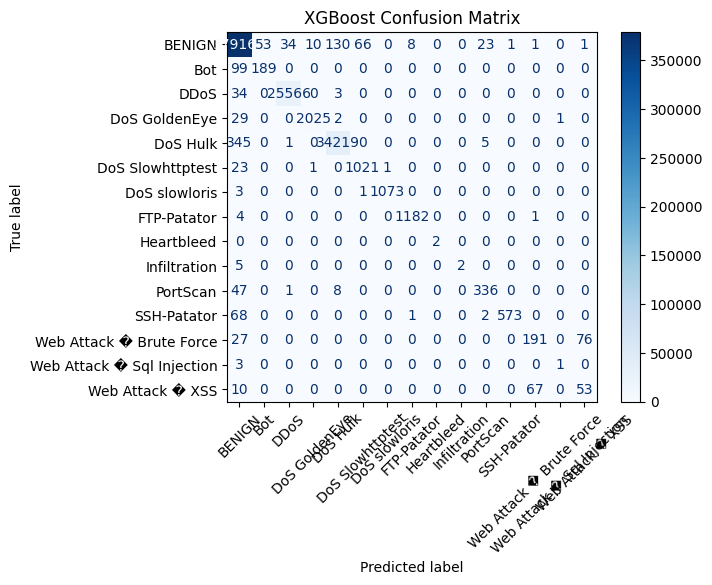

In [32]:
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    classification_report, confusion_matrix, ConfusionMatrixDisplay
)

# ======================
# Confusion Matrix
# ======================
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)

plt.figure(figsize=(10, 8))
disp.plot(cmap='Blues', xticks_rotation=45, values_format='d')
plt.title("XGBoost Confusion Matrix")
plt.show()